# Prediciting Evolutionary Dynamics of Microbial Systems with  Reinforcement Learnin


## Overal View of the Algorithm

![img](RLDFBA.jpg)

### Step 1: Define toy models and the constants and load the toy networks

In [1]:
from cobra import Model, Reaction, Metabolite

"""
A Toy Model is a Cobra Model with the following:

Toy_Model_SA

Reactions(NOT BALANCED):

-> S  Substrate uptake
S + ADP -> S_x + ATP  ATP production from catabolism
ATP -> ADP ATP maintenance
S_x + ATP -> X + ADP  Biomass production
S_x + ATP -> Amylase + ADP  Amylase production
Amylase -> Amylase Exchange
X -> Biomass Out
S_x + ADP -> P + ATP Metabolism stuff!
P ->  Product release

Metabolites:

P  Product
S  Substrate
S_x  Internal metabolite
X  Biomass
ADP  
ATP
Amylase

-----------------------------------------------------------------------


Toy_Model_NE_1:


EX_S_sp1: S -> lowerBound',-10,'upperBound',0
EX_A_sp1: A -> lowerBound',-100,'upperBound',100
EX_B_sp1: B -> lowerBound',-100,'upperBound',100
EX_P_sp1: P->  lowerBound',0,'upperBound',100
R_1_sp1: S  + 2 adp  -> P + 2 atp ,'lowerBound',0,'upperBound',Inf
R_2_sp1: P + atp  -> B  + adp 'lowerBound',0,'upperBound',Inf
R_3_sp1: P + 3 atp  -> A + 3 adp ,'lowerBound',0,'upperBound',Inf
R_4_sp1: 'atp -> adp  lowerBound',0,'upperBound',Inf
OBJ_sp1: 3 A + 3 B + 5 atp  -> 5 adp + biomass_sp1 lowerBound',0,'upperBound',Inf
Biomass_1 biomass_sp1  -> ','lowerBound',0,'upperBound',Inf,'objectiveCoef', 1);





Toy_Model_NE_2:


EX_S_sp1: S -> lowerBound',-10,'upperBound',0
EX_A_sp1: A -> lowerBound',-100,'upperBound',100
EX_B_sp1: B -> lowerBound',-100,'upperBound',100
EX_P_sp1: P->  lowerBound',0,'upperBound',100
R_1_sp1: S  + 2 adp  -> P + 2 atp ,'lowerBound',0,'upperBound',Inf
R_2_sp1: P + atp  -> B  + adp 'lowerBound',0,'upperBound',Inf
R_3_sp1: P + 3 atp  -> A + 3 adp ,'lowerBound',0,'upperBound',Inf
R_4_sp1: 'atp -> adp  lowerBound',0,'upperBound',Inf
OBJ_sp1: 3 A + 3 B + 5 atp  -> 5 adp + biomass_sp1 lowerBound',0,'upperBound',Inf
Biomass_1 biomass_sp1  -> ','lowerBound',0,'upperBound',Inf,'objectiveCoef', 1);

"""
ToyModel_SA = Model('Toy_Model')

### S_Uptake ###

S_Uptake = Reaction('Glc_Ex')
S = Metabolite('Glc', compartment='c')
S_Uptake.add_metabolites({S: -1})
S_Uptake.lower_bound = -10
S_Uptake.upper_bound = 0
ToyModel_SA.add_reaction(S_Uptake)

### ADP Production From Catabolism ###

ATP_Cat = Reaction('ATP_Cat')
ADP = Metabolite('ADP', compartment='c')
ATP = Metabolite('ATP', compartment='c')
S_x = Metabolite('S_x', compartment='c')
ATP_Cat.add_metabolites({ADP: -1, S: -1, S_x: 1, ATP: 1})
ATP_Cat.lower_bound = 0
ATP_Cat.upper_bound = 1000
ToyModel_SA.add_reaction(ATP_Cat)

### ATP Maintenance ###

ATP_M = Reaction('ATP_M')
ATP_M.add_metabolites({ATP: -1, ADP: 1})
ATP_M.lower_bound = 1
ATP_M.upper_bound = 100
ToyModel_SA.add_reaction(ATP_M)

### Biomass Production ###

X = Metabolite('X', compartment='c')
X_Production = Reaction('X_Production')
X_Production.add_metabolites({S_x: -1, ATP: -10, ADP: 10, X: 0.01})
X_Production.lower_bound = 0
X_Production.upper_bound = 1000
ToyModel_SA.add_reaction(X_Production)

### Biomass Release ###

X_Release = Reaction('X_Ex')
X_Release.add_metabolites({X: -1})
X_Release.lower_bound = 0
X_Release.upper_bound = 1000
ToyModel_SA.add_reaction(X_Release)

### Metabolism stuff ###

P = Metabolite('P', compartment='c')
P_Prod = Reaction('P_Prod')
P_Prod.add_metabolites({S_x: -0.1, ATP: 1, ADP: -1, P: 0.1})
P_Prod.lower_bound = 0
P_Prod.upper_bound = 1000
ToyModel_SA.add_reaction(P_Prod)

### Product Release ###

P_out = Reaction('P_Ex')
P_out.add_metabolites({P: -1})
P_out.lower_bound = 0
P_out.upper_bound = 1000
ToyModel_SA.add_reaction(P_out)
ToyModel_SA.objective = 'X_Ex'

### Amylase Production ###
Amylase_Prod = Reaction('Amylase_Prod')
Amylase = Metabolite('Amylase', compartment='c')
Amylase_Prod.add_metabolites({P: -1, ATP: -20, ADP: 20, Amylase: 1})
Amylase_Prod.lower_bound =0
Amylase_Prod.upper_bound = 1000
ToyModel_SA.add_reaction(Amylase_Prod)

### Amylase Exchange ###
Amylase_Ex = Reaction('Amylase_Ex')
Amylase_Ex.add_metabolites({Amylase: -1})
Amylase_Ex.lower_bound = 0
Amylase_Ex.upper_bound = 1000
ToyModel_SA.add_reaction(Amylase_Ex)

ToyModel_SA.Biomass_Ind=4





### S_Uptake ###
Toy_Model_NE_1 = Model('Toy_1')
                       
EX_S_sp1 = Reaction('EX_S_sp1')
S = Metabolite('S', compartment='c')
EX_S_sp1.add_metabolites({S: -1})
EX_S_sp1.lower_bound = -10
EX_S_sp1.upper_bound = 0
Toy_Model_NE_1.add_reaction(EX_S_sp1)


EX_A_sp1 = Reaction('EX_A_sp1')
A = Metabolite('A', compartment='c')
EX_A_sp1.add_metabolites({A: -1})
EX_A_sp1.lower_bound = -100
EX_A_sp1.upper_bound = 100
Toy_Model_NE_1.add_reaction(EX_A_sp1)


EX_B_sp1 = Reaction('EX_B_sp1')
B = Metabolite('B', compartment='c')
EX_B_sp1.add_metabolites({B: -1})
EX_B_sp1.lower_bound = -100
EX_B_sp1.upper_bound = 100
Toy_Model_NE_1.add_reaction(EX_B_sp1)



EX_P_sp1 = Reaction('EX_P_sp1')
P = Metabolite('P', compartment='c')
EX_P_sp1.add_metabolites({P:-1})
EX_P_sp1.lower_bound = 0
EX_P_sp1.upper_bound = 100
Toy_Model_NE_1.add_reaction(EX_P_sp1)


R_1_sp1 = Reaction('R_1_sp1')
ADP = Metabolite('ADP', compartment='c')
ATP = Metabolite('ATP', compartment='c')
R_1_sp1.add_metabolites({ADP: -2, S: -1, P: 1, ATP: 2})
R_1_sp1.lower_bound = 0
R_1_sp1.upper_bound = 1000
Toy_Model_NE_1.add_reaction(R_1_sp1)


R_2_sp1 = Reaction('R_2_sp1')
R_2_sp1.add_metabolites({ADP: 1, P: -1, B: 3, ATP: -1})
R_2_sp1.lower_bound = 0
R_2_sp1.upper_bound = 1000
Toy_Model_NE_1.add_reaction(R_2_sp1)


R_3_sp1 = Reaction('R_3_sp1')
R_3_sp1.add_metabolites({ADP: 3, P: -1, A: 1, ATP: -3})
R_3_sp1.lower_bound = 0
R_3_sp1.upper_bound = 1000
Toy_Model_NE_1.add_reaction(R_3_sp1)



R_4_sp1 = Reaction('R_4_sp1')
R_4_sp1.add_metabolites({ADP:1 ,ATP: -1})
R_4_sp1.lower_bound = 0
R_4_sp1.upper_bound = 1000
Toy_Model_NE_1.add_reaction(R_4_sp1)




OBJ_sp1 = Reaction("OBJ_sp1")
biomass_sp1 = Metabolite('biomass_sp1', compartment='c')
OBJ_sp1.add_metabolites({ADP:5 ,ATP: -5,biomass_sp1:0.1,A:-1,B:-1})
OBJ_sp1.lower_bound = 0
OBJ_sp1.upper_bound = 1000
Toy_Model_NE_1.add_reaction(OBJ_sp1)

Biomass_1 = Reaction("Biomass_1")
Biomass_1.add_metabolites({biomass_sp1:-1})
Biomass_1.lower_bound = 0
Biomass_1.upper_bound = 1000
Toy_Model_NE_1.add_reaction(Biomass_1)

Toy_Model_NE_1.objective='Biomass_1'
Toy_Model_NE_1.Biomass_Ind=8


### ADP Production From Catabolism ###

Toy_Model_NE_2 = Model('Toy_2')

### S_Uptake ###

EX_S_sp2 = Reaction('EX_S_sp2')
S = Metabolite('S', compartment='c')
EX_S_sp2.add_metabolites({S: -1})
EX_S_sp2.lower_bound = -10
EX_S_sp2.upper_bound = 0
Toy_Model_NE_2.add_reaction(EX_S_sp2)


EX_A_sp2 = Reaction('EX_A_sp2')
A = Metabolite('A', compartment='c')
EX_A_sp2.add_metabolites({A: -1})
EX_A_sp2.lower_bound = -100
EX_A_sp2.upper_bound = 100
Toy_Model_NE_2.add_reaction(EX_A_sp2)


EX_B_sp2 = Reaction('EX_B_sp2')
B = Metabolite('B', compartment='c')
EX_B_sp2.add_metabolites({B: -1})
EX_B_sp2.lower_bound = -100
EX_B_sp2.upper_bound = 100
Toy_Model_NE_2.add_reaction(EX_B_sp2)



EX_P_sp2 = Reaction('EX_P_sp2')
P = Metabolite('P', compartment='c')
EX_P_sp2.add_metabolites({P:-1})
EX_P_sp2.lower_bound = 0
EX_P_sp2.upper_bound = 100
Toy_Model_NE_2.add_reaction(EX_P_sp2)


R_1_sp2 = Reaction('R_1_sp2')
ADP = Metabolite('ADP', compartment='c')
ATP = Metabolite('ATP', compartment='c')
R_1_sp2.add_metabolites({ADP: -2, S: -1, P: 1, ATP: 2})
R_1_sp2.lower_bound = 0
R_1_sp2.upper_bound = 1000
Toy_Model_NE_2.add_reaction(R_1_sp2)


R_2_sp2 = Reaction('R_2_sp2')
R_2_sp2.add_metabolites({ADP: 3, P: -1, B: 1, ATP: -3})
R_2_sp2.lower_bound = 0
R_2_sp2.upper_bound = 1000
Toy_Model_NE_2.add_reaction(R_2_sp2)


R_3_sp2 = Reaction('R_3_sp2')
R_3_sp2.add_metabolites({ADP: 1, P: -1, A: 3, ATP: -1})
R_3_sp2.lower_bound = 0
R_3_sp2.upper_bound = 1000
Toy_Model_NE_2.add_reaction(R_3_sp2)



R_4_sp2 = Reaction('R_4_sp2')
R_4_sp2.add_metabolites({ADP:1 ,ATP: -1})
R_4_sp2.lower_bound = 0
R_4_sp2.upper_bound = 1000
Toy_Model_NE_2.add_reaction(R_4_sp2)




OBJ_sp2 = Reaction("OBJ_sp2")
biomass_sp2 = Metabolite('biomass_sp2', compartment='c')
OBJ_sp2.add_metabolites({ADP:5 ,ATP: -5,biomass_sp2:0.1,A:-1,B:-1})
OBJ_sp2.lower_bound = 0
OBJ_sp2.upper_bound = 1000
Toy_Model_NE_2.add_reaction(OBJ_sp2)

Biomass_2 = Reaction("Biomass_2")
Biomass_2.add_metabolites({biomass_sp2:-1})
Biomass_2.lower_bound = 0
Biomass_2.upper_bound = 1000
Toy_Model_NE_2.add_reaction(Biomass_2)
Toy_Model_NE_2.objective="Biomass_2"
Toy_Model_NE_2.Biomass_Ind=8




if __name__ == '__main__':
    print(ToyModel_SA.optimize().fluxes)
    print(ToyModel_SA.exchanges)
    print(ToyModel_SA.optimize().status)
    print(Toy_Model_NE_1.optimize().fluxes)
    print(Toy_Model_NE_1.exchanges)
    print(Toy_Model_NE_2.optimize().fluxes)
    print(Toy_Model_NE_2.exchanges)

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Glc_Ex         -10.0000
ATP_Cat         10.0000
ATP_M            1.0000
X_Production     5.4500
X_Ex             0.0545
P_Prod          45.5000
P_Ex             4.5500
Amylase_Prod     0.0000
Amylase_Ex       0.0000
Name: fluxes, dtype: float64
[<Reaction Glc_Ex at 0x104c868e0>, <Reaction X_Ex at 0x16430cfa0>, <Reaction P_Ex at 0x16430cbe0>, <Reaction Amylase_Ex at 0x16461d610>]
optimal
EX_S_sp1    -10.0
EX_A_sp1     -4.0
EX_B_sp1     -4.0
EX_P_sp1     10.0
R_1_sp1      10.0
R_2_sp1       0.0
R_3_sp1       0.0
R_4_sp1       0.0
OBJ_sp1       4.0
Biomass_1     0.4
Name: fluxes, dtype: float64
[<Reaction EX_S_sp1 at 0x16461dfa0>, <Reaction EX_A_sp1 at 0x164626580>, <Reaction EX_B_sp1 at 0x164626760>, <Reaction EX_P_sp1 at 0x164626970>, <Reaction Biomass_1 at 0x16462edc0>]
EX_S_sp2    -10.0
EX_A_sp2     -4.0
EX_B_sp2     -4.0
EX_P_sp2     10.0
R_1_sp2      10.0
R_2_sp2      

In [82]:
from asyncore import write
from cmath import inf
from dataclasses import dataclass,field
import datetime
from tkinter import HIDDEN
from xmlrpc.client import DateTime
import numpy as np
import cobra
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing
import pickle
import pandas
#import cplex
from ToyModel import  Toy_Model_NE_1,Toy_Model_NE_2
import torch
import torch.nn as nn
import torch.optim as optim
from collections import namedtuple,deque
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
import warnings
import torch.autograd
from torch.autograd import Variable
import gym
from tensorboardX import SummaryWriter
warnings.filterwarnings("ignore")
Scaler=StandardScaler()
HIDDEN_SIZE=20
NUMBER_OF_BATCHES=300
Main_dir = os.path.dirname(".")


### Then we have to define a number of classes, objects, and functions that will be used during the simulations!

In [101]:
Episode = namedtuple('Episode', field_names=['reward', 'steps'])
EpisodeStep = namedtuple('EpisodeStep', field_names=['observation', 'action'])

        
class Memory:
    def __init__(self, max_size):
        self.buffer = deque(maxlen=max_size)
    
    def push(self, state, action, reward, next_state):
        experience = (state, action, np.array([reward]), next_state)
        self.buffer.appendleft(experience)

    def sample(self, batch_size):
        state_batch = []
        action_batch = []
        reward_batch = []
        next_state_batch = []
        done_batch = []

        batch = random.sample(self.buffer, batch_size)

        for experience in batch:
            state, action, reward, next_state = experience
            state_batch.append(state)
            action_batch.append(action)
            reward_batch.append(reward)
            next_state_batch.append(next_state)
            
        
        return state_batch, action_batch, reward_batch, next_state_batch

    def __len__(self):
        return len(self.buffer)



class DDPGActor(nn.Module):

    def __init__(self, obs_size, act_size):
        super(DDPGActor, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(obs_size, 300),nn.Tanh(),
            nn.Linear(300,300),nn.Tanh(),
            nn.Linear(300,300),nn.Tanh(),
            nn.Linear(300, act_size),nn.Hardtanh(min_val=-10,max_val=10)
            
             )

    def forward(self, x):
       return self.net(x)

class DDPGCritic(nn.Module):       
    
    def __init__(self, obs_size, act_size):

        super(DDPGCritic, self).__init__()
        self.obs_net = nn.Sequential(
            nn.Linear(obs_size, 300),nn.Tanh(),
            nn.Linear(300,300),nn.Tanh(),   
            nn.Linear(300,300),nn.Tanh(),
            nn.Linear(300,200),
            
            )


        self.out_net = nn.Sequential(
                       nn.Linear(200 + act_size, 300),nn.Tanh(),
                       nn.Linear(300,300),nn.Tanh(),
                       nn.Linear(300, 1),
                       )
    
    def forward(self, x, a):
        obs = self.obs_net(x)           
        return self.out_net(torch.cat([obs, a],dim=1))

### Definition of DFBA function

In [102]:
def dFBA(Models, Mapping_Dict, Init_C, Params, t_span, dt=0.1):
    """
    This function calculates the concentration of each species
    Models is a list of COBRA Model objects
    Mapping_Dict is a dictionary of dictionaries
    """
    ##############################################################
    # Initializing the ODE Solver
    ##############################################################
    t = np.arange(t_span[0], t_span[1], dt)
    ##############################################################
    # Solving the ODE
    ##############################################################
    for m in Models:
        m.episode_reward=0
        m.episode_steps=[]

    
    sol, t = odeFwdEuler(ODE_System, Init_C, dt,  Params,
                         t_span, Models, Mapping_Dict)
    
    for m in Models:
        m.Episode=Episode(reward=m.episode_reward, steps=m.episode_steps)




    return [m.Episode for m in Models]

def ODE_System(C, t, Models, Mapping_Dict, Params, dt,Counter):
    """
    This function calculates the differential equations for the system
    Models is a list of COBRA Model objects
    NOTE: this implementation of DFBA is compatible with RL framework
    Given a policy it will genrate episodes. Policies can be either deterministic or stochastic
    Differential Equations Are Formatted as follows:
    [0]-Models[1]
    [1]-Models[2]
    []-...
    [n-1]-Models[n]
    [n]-Exc[1]
    [n+1]-Exc[2]
    []-...
    [n+m-1]-Exc[m]
    [n+m]-Starch
    """
    C[C < 0] = 0
    dCdt = np.zeros(C.shape)
    Sols = list([0 for i in range(Models.__len__())])
    for i,M in enumerate(Models):
        M.a=M.policy(torch.FloatTensor([C[M.observables]/Params["Env_States_Initial_MAX"]])).detach().numpy()[0]
        if random.random()<M.epsilon:
            
            # M.a=M.policy(torch.FloatTensor([C[M.observables]])).detach().numpy()[0]
            # M.rand_act=np.random.uniform(low=-1, high=1,size=len(M.actions)).copy()
            # M.a+=M.rand_act
            M.a+=np.random.uniform(low=-5, high=5,size=len(M.actions))
#             M.a=np.random.uniform(low=-10, high=10,size=len(M.actions))

        else:
            pass

        for index,item in enumerate(Mapping_Dict["Ex_sp"]):
            if Mapping_Dict['Mapping_Matrix'][index,i]!=-1:
                M.reactions[Mapping_Dict['Mapping_Matrix'][index,i]].upper_bound=100
                M.reactions[Mapping_Dict['Mapping_Matrix'][index,i]].lower_bound=-General_Uptake_Kinetics(C[index+len(Models)])
                
            
        for index,flux in enumerate(M.actions):

            if M.a[index]<0:
            
                M.reactions[M.actions[index]].lower_bound=max(M.a[index],M.reactions[M.actions[index]].lower_bound)
    
            else:

                M.reactions[M.actions[index]].lower_bound=M.a[index]

            M.reactions[M.actions[index]].upper_bound=M.reactions[M.actions[index]].lower_bound+0.000001


        Sols[i] = Models[i].optimize()

        if Sols[i].status == 'infeasible':
            Models[i].reward= -1
            dCdt[i] = 0

        else:
            dCdt[i] += Sols[i].objective_value*C[i]
            Models[i].reward =Sols[i].objective_value*C[i]



    ### Writing the balance equations

    for i in range(Mapping_Dict["Mapping_Matrix"].shape[0]):
        for j in range(len(Models)):
            if Mapping_Dict["Mapping_Matrix"][i, j] != -1:
                if Sols[j].status == 'infeasible':
                    dCdt[i+len(Models)] += 0
                else:
                    dCdt[i+len(Models)] += Sols[j].fluxes.iloc[Mapping_Dict["Mapping_Matrix"]
                                                                    [i, j]]*C[j]
    dCdt += np.array(Params["Dilution_Rate"])*(Params["Inlet_C"]-C)
    Next_C=C+dCdt*dt
    for m in Models:
        m.buffer.push(torch.FloatTensor([C[m.observables]/Params["Env_States_Initial_MAX"]]).detach().numpy()[0],m.a,m.reward,torch.FloatTensor([Next_C[m.observables]/Params["Env_States_Initial_MAX"]]).detach().numpy()[0])
        if Counter>0 and Counter%m.update_batch==0:
            # TD_Error=[]
            S,A,R,Sp=m.buffer.sample(min(500,m.buffer.buffer.__len__()))
            
            
            Qvals = m.value(torch.FloatTensor(S), torch.FloatTensor(A))
            next_actions = m.policy_target(torch.FloatTensor(Sp)).detach()
            next_Q = m.value_target(torch.FloatTensor(Sp), next_actions)
            # Qprime = torch.FloatTensor(R) + next_Q-m.R
            Qprime = torch.FloatTensor(R) +m.gamma*next_Q
            critic_loss=m.Net_Obj(Qvals,Qprime.detach())
            
            
            
            
            m.optimizer_value.zero_grad()
            critic_loss.backward()
            m.optimizer_value.step()
            
            policy_loss = -m.value(torch.FloatTensor(S), m.policy(torch.FloatTensor(S))).mean()
            # m.R=m.alpha*torch.mean(Qvals-Qprime+torch.FloatTensor(R)-m.R).detach().numpy()
            m.optimizer_policy.zero_grad()
            policy_loss.backward()
            m.optimizer_policy.step()
            
        
            for target_param, param in zip(m.policy_target.parameters(), m.policy.parameters()):
                target_param.data.copy_(param.data * m.tau + target_param.data * (1-m.tau))
        
            for target_param, param in zip(m.value_target.parameters(), m.value.parameters()):
                target_param.data.copy_(param.data * m.tau + target_param.data * (1-m.tau ))
        
        
        
        
        
        
        
        
        
        
        
        m.episode_reward+=m.reward

    
    
    return dCdt

### Now we need some utility functions!

In [103]:
def Build_Mapping_Matrix(Models):
    """
    Given a list of COBRA model objects, this function will build a mapping matrix

    """

    Ex_sp = []
    Temp_Map={}
    for model in Models:
        
        
        if not hasattr(model,"Biomass_Ind"):
            raise Exception("Models must have 'Biomass_Ind' attribute in order for the DFBA to work properly!")
        
        
        for Ex_rxn in model.exchanges :
            if Ex_rxn!=model.reactions[model.Biomass_Ind]:
                if list(Ex_rxn.metabolites.keys())[0].id not in Ex_sp:
                    Ex_sp.append(list(Ex_rxn.metabolites.keys())[0].id)
                if list(Ex_rxn.metabolites.keys())[0].id in Temp_Map.keys():
                   Temp_Map[list(Ex_rxn.metabolites.keys())[0].id][model]=Ex_rxn
                else:
                     Temp_Map[list(Ex_rxn.metabolites.keys())[0].id]={model:Ex_rxn}

    Mapping_Matrix = np.zeros((len(Ex_sp), len(Models)), dtype=int)
    for i, id in enumerate(Ex_sp):
        for j, model in enumerate(Models):
            if model in Temp_Map[id].keys():
                Mapping_Matrix[i, j] = model.reactions.index(Temp_Map[id][model].id)
            else:
                Mapping_Matrix[i, j] = -1
    return {"Ex_sp": Ex_sp, "Mapping_Matrix": Mapping_Matrix}






def Starch_Degradation_Kinetics(a_Amylase: float, Starch: float, Model="", k: float = 1):
    """
    This function calculates the rate of degradation of starch
    a_Amylase Unit: mmol
    Starch Unit: mg

    """

    return a_Amylase*Starch*k/(Starch+10)


def Glucose_Uptake_Kinetics(Glucose: float, Model=""):
    """
    This function calculates the rate of glucose uptake
    ###It is just a simple imaginary model: Replace it with better model if necessary###
    Glucose Unit: mmol

    """
    return 20*(Glucose/(Glucose+20))


def General_Uptake_Kinetics(Compound: float, Model=""):
    """
    This function calculates the rate of uptake of a compound in the reactor
    ###It is just a simple imaginary model: Replace it with better model if necessary###
    Compound Unit: mmol

    """
    return 20*(Compound/(Compound+20))





def odeFwdEuler(ODE_Function, ICs, dt, Params, t_span, Models, Mapping_Dict):
    Integrator_Counter = 0
    t = np.arange(t_span[0], t_span[1], dt)
    sol = np.zeros((len(t), len(ICs)))
    sol[0] = ICs
    for i in range(1, len(t)):
        sol[i] = sol[i-1] + \
            ODE_Function(sol[i-1], t[i-1], Models, Mapping_Dict,
                         Params, dt,Integrator_Counter)*dt
        Integrator_Counter += 1
    return sol, t


def Generate_Batch(dFBA, Params, Init_C, Models, Mapping_Dict,writer,t_span=[0, 100], dt=0.1):


    Init_C[list(Params["Env_States"])] = [random.uniform(Range[0], Range[1]) for Range in Params["Env_States_Initial_Ranges"]]

    
    for BATCH in range(NUMBER_OF_BATCHES):
        for model in Models:
            model.epsilon=0.01+0.99/(np.exp(BATCH/20))
            model.tau=0.01/(np.exp(BATCH/20))
        dFBA(Models, Mapping_Dict, Init_C, Params, t_span, dt=dt)
    
        for mod in Models:
            print(f"{BATCH} - {mod.NAME} earned {mod.episode_reward} during this episode!")
            writer.add_scalar(f"{mod.NAME} reward_mean", mod.episode_reward, BATCH)
    





def Flux_Clipper(Min,Number,Max):
    return(min(max(Min,Number),Max))

### We now define the high level main function that controls every part of the code

In [108]:
def main(Models: list = [Toy_Model_NE_1.copy(), Toy_Model_NE_2.copy()], max_time: int = 100, Dil_Rate: float = 0.000000001, alpha: float = 0.01, Starting_Q: str = "FBA"):
    """
    This is the main function for running dFBA.
    The main requrement for working properly is
    that the models use the same notation for the
    same reactions.

    Starting_Policy:

    Defult --> Random: Initial Policy will be a random policy for all agents.
    Otherwise --> a list of policies, pickle file addresses, for each agent.


    """
    # Adding Agents info ###-----------------------------------------------------

    # State dimensions in this RLDFBA variant include: [Agent1,...,Agentn, glucose,starch]
    for i in range(len(Models)):
        if not hasattr(Models[i], "_name"):
            Models[i].NAME = "Agent_" + str(i)
            print(f"Agent {i} has been given a defult name")
        Models[i].solver.objective.name = "_pfba_objective"
    # -------------------------------------------------------------------------------

    # Mapping internal reactions to external reactions, and operational parameter
    # setup ###-------------------------------------------------------------------

    # For more information about the structure of the ODEs,see ODE_System function
    # or the documentation.

    Mapping_Dict = Build_Mapping_Matrix(Models)
    Init_C = np.ones((len(Models)+len(Mapping_Dict["Ex_sp"]),))
    Inlet_C = np.zeros((len(Models)+len(Mapping_Dict["Ex_sp"]),))

    #Parameters that are use inside DFBA

    Params = {
        "Dilution_Rate": Dil_Rate,
        "Inlet_C": Inlet_C,
        "Agents_Index": [i for i in range(len(Models))],
    }

    #Define Agent attributes
    Obs=[i for i in range(len(Models))]
    Obs.extend([Mapping_Dict["Ex_sp"].index(sp)+len(Models) for sp in Mapping_Dict["Ex_sp"] if sp!='P' ])
    for ind,m in enumerate(Models):
        m.observables=Obs
        m.actions=(Mapping_Dict["Mapping_Matrix"][Mapping_Dict["Ex_sp"].index("A"),ind],Mapping_Dict["Mapping_Matrix"][Mapping_Dict["Ex_sp"].index("B"),ind])
        m.policy=DDPGActor(len(m.observables),len(m.actions))
        m.policy_target=DDPGActor(len(m.observables),len(m.actions))
        m.value=DDPGCritic(len(m.observables),len(m.actions))
        m.value_target=DDPGCritic(len(m.observables),len(m.actions))
        m.R=0
        m.tau=0.005
        m.optimizer_policy=optim.Adam(params=m.policy.parameters(), lr=0.001)
        m.optimizer_policy_target=optim.SGD(params=m.policy.parameters(), lr=0.001)
        m.optimizer_value=optim.Adam(params=m.value.parameters(), lr=0.0001)
        m.optimizer_value_target=optim.SGD(params=m.value.parameters(), lr=0.001)
        m.Net_Obj=nn.MSELoss()
        m.buffer=Memory(100000)
        m.alpha=0.01
        m.update_batch=50
        m.gamma=0.95
        
    ### I Assume that the environment states are all observable. Env states will be stochastic
    Params["Env_States"]=Models[0].observables
    Params["Env_States_Initial_Ranges"]=[[0.01,0.01+0.00000001],[0.01,0.01+0.00000001],[100,100+0.00001],[0.0000000001,0.00000001+0.00000000001],[0.00000001,0.00000001+0.00000000001]]
    Params["Env_States_Initial_MAX"]=np.array([1,1,100,10,10])
    for i in range(len(Models)):
        Init_C[i] = 0.001
        #Models[i].solver = "cplex"
    writer = SummaryWriter(comment="-DeepRLDFBA_NECOM")
    Outer_Counter = 0
    

    Generate_Batch(dFBA, Params, Init_C, Models, Mapping_Dict,writer)
    
    Time=datetime.datetime.now().strftime("%d_%m_%Y.%H_%M_%S")
    if not os.path.exists(os.path.join(Main_dir,"Outputs")):
      os.mkdir(os.path.join(Main_dir,"Outputs"))
    Results_Dir=os.path.join(Main_dir,"Outputs",str(Time))
    os.mkdir(Results_Dir)
    with open(os.path.join(Results_Dir,"Models.pkl"),'wb') as f:
        pickle.dump(Models,f)
    return Models

### Finally it's time to run!!!

## Case 1: Auxotrophy

In [109]:
Toy_Model_NE_1_A=Toy_Model_NE_1.copy()
Toy_Model_NE_2_A=Toy_Model_NE_2.copy()
Toy_Model_NE_1_A.remove_reactions('R_2_sp1')
Toy_Model_NE_1_A.Biomass_Ind=8
Toy_Model_NE_2_A.remove_reactions('R_3_sp2')
Toy_Model_NE_2_A.Biomass_Ind=8
Models_Auxotrophy=[Toy_Model_NE_1_A,Toy_Model_NE_2_A]

In [ ]:

Models_A=main(Models_Auxotrophy)

Agent 0 has been given a defult name
Agent 1 has been given a defult name
0 - Agent_0 earned -283.0266709496419 during this episode!
0 - Agent_1 earned -733.9278965227961 during this episode!
1 - Agent_0 earned -363.81400907540194 during this episode!
1 - Agent_1 earned -57.73146772277182 during this episode!
2 - Agent_0 earned -181.99999999441238 during this episode!
2 - Agent_1 earned 4.858740344583117 during this episode!
3 - Agent_0 earned -334.99999999514307 during this episode!
3 - Agent_1 earned 5.502868428891731 during this episode!
4 - Agent_0 earned -363.99999999529473 during this episode!
4 - Agent_1 earned 5.342771435848561 during this episode!
5 - Agent_0 earned -327.99999999510726 during this episode!
5 - Agent_1 earned 5.709184008896786 during this episode!
6 - Agent_0 earned -298.999999994961 during this episode!
6 - Agent_1 earned 6.043995516613797 during this episode!
7 - Agent_0 earned -300.99999999497095 during this episode!
7 - Agent_1 earned 6.004004245219004 duri

## If you want to load a pretrained model

1- Auxotrophy

In [8]:
with open(os.path.join("Outputs","31_08_2022.08_06_29","Models.pkl"),'rb') as f:
        Models_A=pickle.load(f)

## Step n: Plotting the policy

Observation space of each agent **in this particular example** is similar and contains 5 different states. Our goal is to create a meshgrid dataframe that includes these states and the actions taken as columns 

In [55]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
Space_Size=10000
Space=np.random.uniform(low=[0,0,0,0,0],high=[1,1,1,1,1],size=(Space_Size,5))
Actions_1=Models_A[0].policy(torch.FloatTensor(Space))
Actions_2=Models_A[1].policy(torch.FloatTensor(Space))
DF_1_A=pd.DataFrame(np.hstack((Space,Actions_1.detach().numpy())),columns=["Agent1","Agent2","S","A","B","A_Export","B_Export"])
DF_2_A=pd.DataFrame(np.hstack((Space,Actions_2.detach().numpy())),columns=["Agent1","Agent2","S","A","B","A_Export","B_Export"])


## Agent 1 Policy 

<AxesSubplot:>

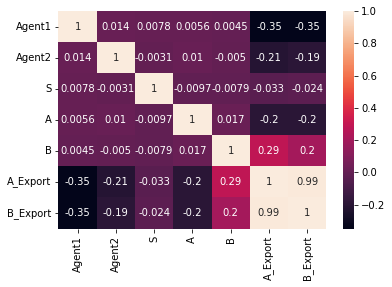

In [77]:
sns.heatmap(DF_1_A.corr(),annot=True,)

In [ ]:
# fig = go.Figure(data=[go.Scatter3d(x=DF_1_A["S"], y=DF_1_A["B"],z=DF_1_A["A_Export"],mode='markers',
#                                        marker=dict(
#         size=5,
#         color=DF_1_A["A_Export"],                # set color to an array/list of desired values
#         colorscale='Viridis',   # choose a colorscale
#         opacity=1,
#         colorbar=dict(thickness=10,title="A Export")),
# )])
# fig.update_layout(scene = dict(
#                     xaxis_title='S[C]',
#                     yaxis_title='B[C]',
#                     zaxis_title='A Export'),
#                     width=600,
#                     margin=dict(r=20, b=10, l=10, t=10))

# fig.show()

In [107]:
# fig = go.Figure(data=[go.Scatter3d(x=DF_1_A["A"], y=DF_1_A["B"],z=DF_1_A["B_Export"],mode='markers',
#                                        marker=dict(
#         size=5,
#         color=DF_1_A["B_Export"],                # set color to an array/list of desired values
#         colorscale='Viridis',   # choose a colorscale
#         opacity=1,
#         colorbar=dict(thickness=10,title="B Export")),
# )])
# fig.update_layout(scene = dict(
#                     xaxis_title='A[C]',
#                     yaxis_title='B[C]',
#                     zaxis_title='B Export'),
#                     width=600,
#                     margin=dict(r=20, b=10, l=10, t=10))

# fig.show()

## Agent 2 Policy

<AxesSubplot:>

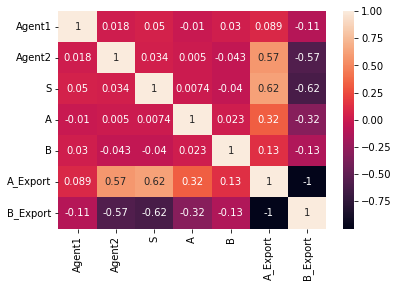

In [46]:
sns.heatmap(DF_2_A.corr(),annot=True,)

In [135]:
# fig = go.Figure(data=[go.Scatter3d(x=DF_2_A["A"], y=DF_2_A["B"],z=DF_2_A["A_Export"],mode='markers',
#                                        marker=dict(
#         size=5,
#         color=DF_2_A["A_Export"],                # set color to an array/list of desired values
#         colorscale='Viridis',   # choose a colorscale
#         opacity=1,
#         colorbar=dict(thickness=10,title="A Export")),
# )])
# fig.update_layout(scene = dict(
#                     xaxis_title='A[C]',
#                     yaxis_title='B[C]',
#                     zaxis_title='A Export'),
#                     width=600,
#                     margin=dict(r=20, b=10, l=10, t=10))

# fig.show()

In [136]:
# fig = go.Figure(data=[go.Scatter3d(x=DF_2_A["A"], y=DF_2_A["B"],z=DF_2_A["B_Export"],mode='markers',
#                                        marker=dict(
#         size=5,
#         color=DF_2_A["B_Export"],                # set color to an array/list of desired values
#         colorscale='Viridis',   # choose a colorscale
#         opacity=1,
#         colorbar=dict(thickness=10,title="B Export")),
# )])
# fig.update_layout(scene = dict(
#                     xaxis_title='A[C]',
#                     yaxis_title='B[C]',
#                     zaxis_title='B Export'),
#                     width=600,
#                     margin=dict(r=20, b=10, l=10, t=10))

# fig.show()

## Case 2: Mutualism

In [40]:
Toy_Model_NE_1_M=Toy_Model_NE_1.copy()
Toy_Model_NE_2_M=Toy_Model_NE_2.copy()
Toy_Model_NE_1_M.Biomass_Ind=9
Toy_Model_NE_2_M.Biomass_Ind=9
Models_Mutualism=[Toy_Model_NE_1_M,Toy_Model_NE_2_M]

In [41]:
Models_M=main(Models_Mutualism)

Agent 0 has been given a defult name
Agent 1 has been given a defult name
0 - Agent_0 earned 26.003270860651003 during this episode!
0 - Agent_1 earned 26.20796855232441 during this episode!
1 - Agent_0 earned 25.1142433789945 during this episode!
1 - Agent_1 earned 25.134364616764685 during this episode!
2 - Agent_0 earned 23.82485495834324 during this episode!
2 - Agent_1 earned 24.093616948223612 during this episode!
3 - Agent_0 earned 22.997011978807052 during this episode!
3 - Agent_1 earned 23.82000757011392 during this episode!
4 - Agent_0 earned 23.18267302428098 during this episode!
4 - Agent_1 earned 24.44462286934741 during this episode!
5 - Agent_0 earned 23.79268941044792 during this episode!
5 - Agent_1 earned 25.314021285163705 during this episode!
6 - Agent_0 earned 24.303330617352657 during this episode!
6 - Agent_1 earned 26.255951091068827 during this episode!
7 - Agent_0 earned 24.620420911893582 during this episode!
7 - Agent_1 earned 27.484314914396194 during this

69 - Agent_0 earned 36.41159435783476 during this episode!
69 - Agent_1 earned 24.14442394738751 during this episode!
70 - Agent_0 earned 38.10091644910697 during this episode!
70 - Agent_1 earned 24.07988903158303 during this episode!
71 - Agent_0 earned 39.293512974858636 during this episode!
71 - Agent_1 earned 23.998712907528663 during this episode!
72 - Agent_0 earned 40.93079648641936 during this episode!
72 - Agent_1 earned 23.844648545792655 during this episode!
73 - Agent_0 earned 42.808628341299816 during this episode!
73 - Agent_1 earned 23.74976146482964 during this episode!
74 - Agent_0 earned 41.95760790768162 during this episode!
74 - Agent_1 earned 23.63024672637114 during this episode!
75 - Agent_0 earned 45.24862114719628 during this episode!
75 - Agent_1 earned 23.51145887399519 during this episode!
76 - Agent_0 earned 42.99934964778978 during this episode!
76 - Agent_1 earned 23.420037912359803 during this episode!
77 - Agent_0 earned 47.198972765242814 during this 

KeyboardInterrupt: 

In [17]:
#or load a pre-trained model

with open(os.path.join("Outputs","31_08_2022.08_12_03","Models.pkl"),'rb') as f:
        Models_M=pickle.load(f)

In [33]:
Space_Size=1000
Space=np.random.uniform(low=[0,0,0,0,0],high=[1,1,1,1,1],size=(Space_Size,5))
Actions_1=Models_M[0].policy(torch.FloatTensor(Space))
Actions_2=Models_M[1].policy(torch.FloatTensor(Space))

In [34]:

DF_1_M=pd.DataFrame(np.hstack((Space,Actions_1.detach().numpy())),columns=["Agent1","Agent2","S","A","B","A_Export","B_Export"])

DF_2_M=pd.DataFrame(np.hstack((Space,Actions_2.detach().numpy())),columns=["Agent1","Agent2","S","A","B","A_Export","B_Export"])

<AxesSubplot:>

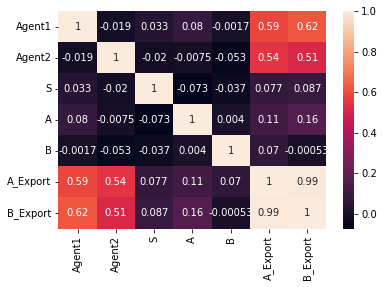

In [35]:
sns.heatmap(DF_1_M.corr(),annot=True,)

In [36]:
fig = go.Figure(data=[go.Scatter3d(x=DF_1["A"], y=DF_1["B"],z=DF_1["A_Export"],mode='markers',
                                       marker=dict(
        size=5,
        color=DF_1["A_Export"],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1,
        colorbar=dict(thickness=10,title="A Export")),
)])
fig.update_layout(scene = dict(
                    xaxis_title='A[C]',
                    yaxis_title='B[C]',
                    zaxis_title='A Export'),
                    width=600,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

In [5]:
fig = go.Figure(data=[go.Scatter3d(x=DF_1["A"], y=DF_1["B"],z=DF_1["B_Export"],mode='markers',
                                       marker=dict(
        size=5,
        color=DF_1["B_Export"],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1,
        colorbar=dict(thickness=10,title="B Export")),
)])
fig.update_layout(scene = dict(
                    xaxis_title='A[C]',
                    yaxis_title='B[C]',
                    zaxis_title='B Export'),
                    width=600,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

## Agent 2 Policy

<AxesSubplot:>

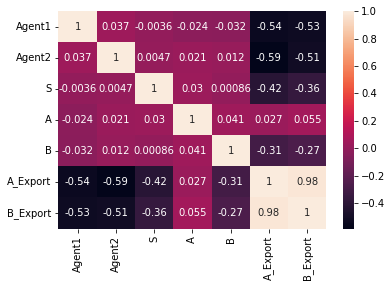

In [32]:
sns.heatmap(DF_2_M.corr(),annot=True,)

In [33]:
fig = go.Figure(data=[go.Scatter3d(x=DF_2["S"], y=DF_2["B"],z=DF_2["A_Export"],mode='markers',
                                       marker=dict(
        size=5,
        color=DF_2["A_Export"],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1,
        colorbar=dict(thickness=10,title="A Export")),
)])
fig.update_layout(scene = dict(
                    xaxis_title='A[C]',
                    yaxis_title='B[C]',
                    zaxis_title='A Export'),
                    width=600,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

In [34]:
fig = go.Figure(data=[go.Scatter3d(x=DF_2["A"], y=DF_2["B"],z=DF_2["B_Export"],mode='markers',
                                       marker=dict(
        size=5,
        color=DF_2["A_Export"],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1,
        colorbar=dict(thickness=10,title="B Export")),
)])
fig.update_layout(scene = dict(
                    xaxis_title='A[C]',
                    yaxis_title='B[C]',
                    zaxis_title='B Export'),
                    width=600,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

## Run a simulation with the trained models

In [67]:
def main_t(Models: list = [Toy_Model_NE_1.copy(), Toy_Model_NE_2.copy()], max_time: int = 100, Dil_Rate: float = 0.000000001, alpha: float = 0.01, Starting_Q: str = "FBA"):
    """
    This is the main function for running dFBA.
    The main requrement for working properly is
    that the models use the same notation for the
    same reactions.

    Starting_Policy:

    Defult --> Random: Initial Policy will be a random policy for all agents.
    Otherwise --> a list of policies, pickle file addresses, for each agent.


    """


    Mapping_Dict = Build_Mapping_Matrix(Models)
    Init_C = np.ones((len(Models)+len(Mapping_Dict["Ex_sp"]),))
    Inlet_C = np.zeros((len(Models)+len(Mapping_Dict["Ex_sp"]),))

    #Parameters that are use inside DFBA

    Params = {
        "Dilution_Rate": Dil_Rate,
        "Inlet_C": Inlet_C,
        "Agents_Index": [i for i in range(len(Models))],
    }

    #Define Agent attributes

    ### I Assume that the environment states are all observable. Env states will be stochastic
    Params["Env_States"]=Models[0].observables
    Params["Env_States_Initial_Ranges"]=[[0.1,0.100001],[0.1,0.100001],[100,100.001],[0.000001,0.0000001+0.000001],[0.000001,0.0000001+0.00001]]
    Params["Env_States_Initial_MAX"]=np.array([1,1,100,10,10])
    Sol,t=Generate_Batch_t(dFBA, Params, Init_C, Models, Mapping_Dict)
    return Sol,t
    


def dFBA_t(Models, Mapping_Dict, Init_C, Params, t_span, dt=0.1):
    """
    This function calculates the concentration of each species
    Models is a list of COBRA Model objects
    Mapping_Dict is a dictionary of dictionaries
    """
    ##############################################################
    # Initializing the ODE Solver
    ##############################################################
    t = np.arange(t_span[0], t_span[1], dt)
    ##############################################################
    # Solving the ODE
    ##############################################################

    
    sol, t = odeFwdEuler(ODE_System_t, Init_C, dt,  Params,
                         t_span, Models, Mapping_Dict)
    
    return sol,t





def ODE_System_t(C, t, Models, Mapping_Dict, Params, dt,Counter):
    """
    This function calculates the differential equations for the system
    Models is a list of COBRA Model objects
    NOTE: this implementation of DFBA is compatible with RL framework
    Given a policy it will genrate episodes. Policies can be either deterministic or stochastic
    Differential Equations Are Formatted as follows:
    [0]-Models[1]
    [1]-Models[2]
    []-...
    [n-1]-Models[n]
    [n]-Exc[1]
    [n+1]-Exc[2]
    []-...
    [n+m-1]-Exc[m]
    [n+m]-Starch
    """
    C[C < 0] = 0
    dCdt = np.zeros(C.shape)
    Sols = list([0 for i in range(Models.__len__())])
    for i,M in enumerate(Models):
        M.a=M.policy(torch.FloatTensor([C[M.observables]/Params["Env_States_Initial_MAX"]])).detach().numpy()[0]

        for index,item in enumerate(Mapping_Dict["Ex_sp"]):
            if Mapping_Dict['Mapping_Matrix'][index,i]!=-1:
                M.reactions[Mapping_Dict['Mapping_Matrix'][index,i]].upper_bound=100
                M.reactions[Mapping_Dict['Mapping_Matrix'][index,i]].lower_bound=-General_Uptake_Kinetics(C[index+len(Models)])
                
            
        for index,flux in enumerate(M.actions):

            if M.a[index]<0:
            
                M.reactions[M.actions[index]].lower_bound=max(M.a[index],M.reactions[M.actions[index]].lower_bound)
    
            else:

                M.reactions[M.actions[index]].lower_bound=M.a[index]

            

        Sols[i] = Models[i].optimize()

        if Sols[i].status == 'infeasible':
            Models[i].reward= -1
            dCdt[i] = 0

        else:
            dCdt[i] += Sols[i].objective_value*C[i]
            Models[i].reward =Sols[i].objective_value*C[i]



    ### Writing the balance equations

    for i in range(Mapping_Dict["Mapping_Matrix"].shape[0]):
        for j in range(len(Models)):
            if Mapping_Dict["Mapping_Matrix"][i, j] != -1:
                if Sols[j].status == 'infeasible':
                    dCdt[i+len(Models)] = 0
                else:
                    dCdt[i+len(Models)] += Sols[j].fluxes.iloc[Mapping_Dict["Mapping_Matrix"]
                                                                    [i, j]]*C[j]          


    
    
    dCdt += np.array(Params["Dilution_Rate"])*(Params["Inlet_C"]-C)
    
    return dCdt






def Generate_Batch_t(dFBA, Params, Init_C, Models, Mapping_Dict,t_span=[0, 100], dt=1):


    Init_C[list(Params["Env_States"])] = [random.uniform(Range[0], Range[1]) for Range in Params["Env_States_Initial_Ranges"]]
    

    Sol,t=dFBA_t(Models, Mapping_Dict, Init_C, Params, t_span, dt=dt)
        # Batch_Episodes.append(dFBA(Models, Mapping_Dict, Init_C, Params, t_span, dt=dt))

    return Sol,t  


Solution_t=main_t(Models_A)



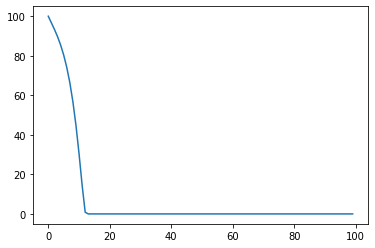

In [72]:
plt.plot(Solution_t[0][:,[2]])


In [81]:
Solution_t

(array([[1.00000711e-01, 1.00000175e-01, 1.00000970e+02, 1.00003501e-02,
         1.00001352e-02, 1.00000000e+00],
        [1.00100663e-01, 1.00100129e-01, 9.99959719e+01, 8.00127072e-03,
         8.00109882e-03, 1.00499765e+00],
        [1.00180722e-01, 1.00180189e-01, 9.99919688e+01, 6.40005063e-03,
         6.39991305e-03, 1.00900067e+00],
        [1.00244816e-01, 1.00244285e-01, 9.99887639e+01, 5.11814090e-03,
         5.11803084e-03, 1.01220542e+00],
        [1.00296108e-01, 1.00295578e-01, 9.99861992e+01, 4.09227194e-03,
         4.09218392e-03, 1.01477006e+00],
        [1.00337143e-01, 1.00336613e-01, 9.99841473e+01, 3.27156416e-03,
         3.27149379e-03, 1.01682181e+00],
        [1.00369963e-01, 1.00369433e-01, 9.99825062e+01, 2.61515447e-03,
         2.61509820e-03, 1.01846282e+00],
        [1.00396207e-01, 1.00395678e-01, 9.99811939e+01, 2.09025859e-03,
         2.09021359e-03, 1.01977504e+00],
        [1.00417190e-01, 1.00416661e-01, 9.99801447e+01, 1.67059549e-03,
       

In [76]:
DF_1_A['Agent']='Model_1'
DF_1_A['Case']="Auxotrophy"
DF_2_A['Agent']='Model_2'
DF_2_A['Case']="Auxotrophy"
Auxotrophy_DF=pd.concat([DF_1_A[["A_Export","B_Export","Agent","Case"]],DF_2_A[["A_Export","B_Export","Agent","Case"]]])


In [77]:
DF_1_M['Agent']='Model_1'
DF_1_M['Case']="Mutualism"
DF_2_M['Agent']='Model_2'
DF_2_M['Case']="Mutualism"
Mutualism_DF=pd.concat([DF_1_M[["A_Export","B_Export","Agent","Case"]],DF_2_M[["A_Export","B_Export","Agent","Case"]]])

In [78]:
Final_DF=pd.concat([Auxotrophy_DF,Mutualism_DF])

In [79]:
import plotly.express as px

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure()

# fig.add_trace(go.Box(
#     y=Final_DF[(Final_DF['Case']=='Mutualism')&(Final_DF['Agent']=='Model_1')]['A_Export'],
#     x=Final_DF[(Final_DF['Case']=='Mutualism')&(Final_DF['Agent']=='Model_1')]['Case'],
#     name='A_Export: Agent_1',
#     marker_color='#3D9970'
# ))

# fig.add_trace(go.Box(
#     y=Final_DF[(Final_DF['Case']=='Mutualism')&(Final_DF['Agent']=='Model_1')]['B_Export'],
#     x=Final_DF[(Final_DF['Case']=='Mutualism')&(Final_DF['Agent']=='Model_1')]['Case'],
#     name='B_Export: Agent_1',
#     marker_color='#FF4136'
# ))

# fig.add_trace(go.Box(
#     y=Final_DF[(Final_DF['Case']=='Auxotrophy')&(Final_DF['Agent']=='Model_1')]['A_Export'],
#     x=Final_DF[(Final_DF['Case']=='Auxotrophy')&(Final_DF['Agent']=='Model_1')]['Case'],
#     name='A_Export: Agent_1',
#     marker_color='#3D9970'
# ))

# fig.add_trace(go.Box(
#     y=Final_DF[(Final_DF['Case']=='Auxotrophy')&(Final_DF['Agent']=='Model_1')]['B_Export'],
#     x=Final_DF[(Final_DF['Case']=='Auxotrophy')&(Final_DF['Agent']=='Model_1')]['Case'],
#     name='B_Export: Agent_1',
#     marker_color='#FF4136'
# ))

# fig.add_trace(go.Box(
#     y=Final_DF[(Final_DF['Case']=='Mutualism')&(Final_DF['Agent']=='Model_2')]['A_Export'],
#     x=Final_DF[(Final_DF['Case']=='Mutualism')&(Final_DF['Agent']=='Model_2')]['Case'],
#     name='A_Export: Agent_2',
#     marker_color='#3461eb'
# ))


# fig.add_trace(go.Box(
#     y=Final_DF[(Final_DF['Case']=='Mutualism')&(Final_DF['Agent']=='Model_2')]['B_Export'],
#     x=Final_DF[(Final_DF['Case']=='Mutualism')&(Final_DF['Agent']=='Model_2')]['Case'],
#     name='B_Export: Agent_2',
#     marker_color='#eb6734'
# ))

# fig.add_trace(go.Box(
#     y=Final_DF[(Final_DF['Case']=='Auxotrophy')&(Final_DF['Agent']=='Model_2')]['A_Export'],
#     x=Final_DF[(Final_DF['Case']=='Auxotrophy')&(Final_DF['Agent']=='Model_2')]['Case'],
#     name='A_Export: Agent_2',
#     marker_color='#3461eb'
# ))


# fig.add_trace(go.Box(
#     y=Final_DF[(Final_DF['Case']=='Auxotrophy')&(Final_DF['Agent']=='Model_2')]['B_Export'],
#     x=Final_DF[(Final_DF['Case']=='Auxotrophy')&(Final_DF['Agent']=='Model_2')]['Case'],
#     name='B_Export: Agent_2',
#     marker_color='#eb6734'
# ))


# # fig.add_trace(go.Box(
# #     y=[0.6, 0.7, 0.3, 0.6, 0.0, 0.5, 0.7, 0.9, 0.5, 0.8, 0.7, 0.2],
# #     x=x,
# #     name='radishes',
# #     marker_color='#FF4136'
# # ))
# # fig.add_trace(go.Box(
# #     y=[0.1, 0.3, 0.1, 0.9, 0.6, 0.6, 0.9, 1.0, 0.3, 0.6, 0.8, 0.5],
# #     x=x,
# #     name='carrots',
# #     marker_color='#FF851B'
# # ))

# fig.update_layout(
#     yaxis_title='Policy Distribution',
#     boxmode='group' # group together boxes of the different traces for each value of x
# )
# fig.show()

In [75]:
Final_DF[(Final_DF['Case']=='Auxotrophy')&(Final_DF['Agent']=='Model_1')]['A_Export']

Series([], Name: A_Export, dtype: float64)

## Case 3: Starch Amylase case

In [17]:
from cmath import tanh
import datetime

import numpy as np
import cobra
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing
import pickle
import pandas
#import cplex
import torch
from ToyModel import ToyModel_SA
import torch.nn as nn
import torch.optim as optim
from collections import namedtuple,deque
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
import warnings
import torch.autograd
from torch.autograd import Variable
import gym
from tensorboardX import SummaryWriter

Scaler=StandardScaler()

NUMBER_OF_BATCHES=300
warnings.filterwarnings("ignore")
Scaler=StandardScaler()
HIDDEN_SIZE=20
Main_dir = os.path.dirname(".")

Episode = namedtuple('Episode', field_names=['reward', 'steps'])
EpisodeStep = namedtuple('EpisodeStep', field_names=['observation', 'action'])

        
class Memory:
    def __init__(self, max_size):
        self.buffer = deque(maxlen=max_size)
    
    def push(self, state, action, reward, next_state):
        experience = (state, action, np.array([reward]), next_state)
        self.buffer.appendleft(experience)

    def sample(self, batch_size):
        state_batch = []
        action_batch = []
        reward_batch = []
        next_state_batch = []
       

        batch = random.sample(self.buffer, batch_size)

        for experience in batch:
            state, action, reward, next_state = experience
            state_batch.append(state)
            action_batch.append(action)
            reward_batch.append(reward)
            next_state_batch.append(next_state)
            
        
        return state_batch, action_batch, reward_batch, next_state_batch

    def __len__(self):
        return len(self.buffer)



class DDPGActor(nn.Module):

    def __init__(self, obs_size, act_size):
        super(DDPGActor, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(obs_size, 300),nn.Tanh(),
            nn.Linear(300,300),nn.Tanh(),
            nn.Linear(300,300),nn.Tanh(),
            nn.Linear(300, act_size),
            
             )

    def forward(self, x):
       return self.net(x)

class DDPGCritic(nn.Module):       
    
    def __init__(self, obs_size, act_size):

        super(DDPGCritic, self).__init__()
        self.obs_net = nn.Sequential(
            nn.Linear(obs_size, 300),nn.Tanh(),
            nn.Linear(300,300),nn.Tanh(),   
            nn.Linear(300,300),nn.Tanh(),
            nn.Linear(300,200),nn.ELU()
            
            )


        self.out_net = nn.Sequential(
                       nn.Linear(200 + act_size, 300),nn.Tanh(),
                       nn.Linear(300,300),nn.Tanh(),
                       nn.Linear(300, 1)
                       )
    
    def forward(self, x, a):
        obs = self.obs_net(x)           
        return self.out_net(torch.cat([obs, a],dim=1))

def main(Models: list = [ToyModel_SA.copy(), ToyModel_SA.copy()], max_time: int = 100, Dil_Rate: float = 0.1, alpha: float = 0.01, Starting_Q: str = "FBA"):
    """
    This is the main function for running dFBA.
    The main requrement for working properly is
    that the models use the same notation for the
    same reactions.

    Starting_Policy:

    Defult --> Random: Initial Policy will be a random policy for all agents.
    Otherwise --> a list of policies, pickle file addresses, for each agent.


    """
    # Adding Agents info ###-----------------------------------------------------

    # State dimensions in this RLDFBA variant include: [Agent1,...,Agentn, glucose,starch]
    Number_of_Models = Models.__len__()
    for i in range(Number_of_Models):
        if not hasattr(Models[i], "_name"):
            Models[i].NAME = "Agent_" + str(i)
            print(f"Agent {i} has been given a defult name")
        Models[i].solver.objective.name = "_pfba_objective"
    # -------------------------------------------------------------------------------

    # Mapping internal reactions to external reactions, and operational parameter
    # setup ###-------------------------------------------------------------------

    # For more information about the structure of the ODEs,see ODE_System function
    # or the documentation.

    Mapping_Dict = Build_Mapping_Matrix(Models)
    Init_C = np.zeros((Models.__len__()+Mapping_Dict["Ex_sp"].__len__()+1,))
    Inlet_C = np.zeros((Models.__len__()+Mapping_Dict["Ex_sp"].__len__()+1,))

    # The Params are the main part to change from problem to problem

    Params = {
        "Dilution_Rate": Dil_Rate,
        "Glucose_Index": Mapping_Dict["Ex_sp"].index("Glc")+Models.__len__(),
        "Starch_Index": Mapping_Dict["Ex_sp"].__len__()+Models.__len__(),
        "Amylase_Ind": Mapping_Dict["Ex_sp"].index("Amylase")+Models.__len__(),
        "Inlet_C": Inlet_C,
        "Model_Glc_Conc_Index": [Models[i].reactions.index("Glc_Ex") for i in range(Number_of_Models)],
        "Model_Amylase_Conc_Index": [Models[i].reactions.index("Amylase_Ex") for i in range(Number_of_Models)],
        "Agents_Index": [i for i in range(Number_of_Models)],
    }

    Obs=[i for i in range(len(Models))]
    Obs.extend([Params["Glucose_Index"],Params["Starch_Index"]])
    for ind,m in enumerate(Models):
        m.observables=Obs
        m.actions=(Models[i].reactions.index("Amylase_Ex"),)
        m.policy=DDPGActor(len(m.observables),len(m.actions))
        m.policy_target=DDPGActor(len(m.observables),len(m.actions))
        m.value=DDPGCritic(len(m.observables),len(m.actions))
        m.value_target=DDPGCritic(len(m.observables),len(m.actions))
        m.R=0
        m.tau=0.005
        m.optimizer_policy=optim.Adam(params=m.policy.parameters(), lr=0.0001)
        m.optimizer_policy_target=optim.Adam(params=m.policy.parameters(), lr=0.01)
        m.optimizer_value=optim.Adam(params=m.value.parameters(), lr=0.001)
        m.optimizer_value_target=optim.Adam(params=m.value.parameters(), lr=0.01)
        m.Net_Obj=nn.MSELoss()
        m.buffer=Memory(10000)
        m.alpha=0.01
        m.update_batch=500
        m.gamma=1
    
    Inlet_C[Params["Starch_Index"]] = 10
    Params["Inlet_C"] = Inlet_C
    
    for i in range(Number_of_Models):
        Init_C[i] = 0.001
        #Models[i].solver = "cplex"
    writer = SummaryWriter(comment="-DeepRLDFBA")
    Outer_Counter = 0


    Params["Env_States"]=Models[0].observables
    Params["Env_States_Initial_Ranges"]=[[0.1,0.1+0.00000001],[100,100+0.00001],[10,10+0.00000000001]]
    Params["Env_States_Initial_MAX"]=np.array([10,500,10])
    for i in range(len(Models)):
        Init_C[i] = 0.001
        #Models[i].solver = "cplex"
    writer = SummaryWriter(comment="-DeepRLDFBA_NECOM")
    Outer_Counter = 0


    

    Generate_Batch(dFBA, Params, Init_C, Models, Mapping_Dict,writer)
    Time=datetime.datetime.now().strftime("%d_%m_%Y.%H_%M_%S")
    Results_Dir=os.path.join(Main_dir,"Outputs",str(Time))
    os.mkdir(Results_Dir)
    with open(os.path.join(Results_Dir,"Models.pkl"),'wb') as f:
        pickle.dump(Models,f)
    return Models

    


def dFBA(Models, Mapping_Dict, Init_C, Params, t_span, dt=0.1):
    """
    This function calculates the concentration of each species
    Models is a list of COBRA Model objects
    Mapping_Dict is a dictionary of dictionaries
    """
    ##############################################################
    # Initializing the ODE Solver
    ##############################################################
    t = np.arange(t_span[0], t_span[1], dt)
    ##############################################################
    # Solving the ODE
    ##############################################################
    for m in Models:
        m.episode_reward=0
        m.episode_steps=[]

    
    sol, t = odeFwdEuler(ODE_System, Init_C, dt,  Params,
                         t_span, Models, Mapping_Dict)
    
    for m in Models:
        m.Episode=Episode(reward=m.episode_reward, steps=m.episode_steps)




    return [m.Episode for m in Models]


def ODE_System(C, t, Models, Mapping_Dict, Params, dt,Counter):
    """
    This function calculates the differential equations for the system
    Models is a list of COBRA Model objects
    NOTE: this implementation of DFBA is compatible with RL framework
    Given a policy it will genrate episodes. Policies can be either deterministic or stochastic
    Differential Equations Are Formatted as follows:
    [0]-Models[1]
    [1]-Models[2]
    []-...
    [n-1]-Models[n]
    [n]-Exc[1]
    [n+1]-Exc[2]
    []-...
    [n+m-1]-Exc[m]
    [n+m]-Starch
    """
    C[C < 0] = 0
    dCdt = np.zeros(C.shape)
    Sols = list([0 for i in range(Models.__len__())])
    for i,M in enumerate(Models):
        M.a=M.policy(torch.FloatTensor([C[M.observables]/Params["Env_States_Initial_MAX"]])).detach().numpy()[0]
        if random.random()<M.epsilon:
            
            # M.a=M.policy(torch.FloatTensor([C[M.observables]])).detach().numpy()[0]
            # M.rand_act=np.random.uniform(low=-1, high=1,size=len(M.actions)).copy()
            # M.a+=M.rand_act
            M.a+=np.random.uniform(low=-1, high=1,size=len(M.actions))
#             M.a=np.random.uniform(low=0, high=20,size=len(M.actions))

        else:
            pass

        for index,item in enumerate(Mapping_Dict["Ex_sp"]):
            if Mapping_Dict['Mapping_Matrix'][index,i]!=-1:
                M.reactions[Mapping_Dict['Mapping_Matrix'][index,i]].upper_bound=100
                M.reactions[Mapping_Dict['Mapping_Matrix'][index,i]].lower_bound=-General_Uptake_Kinetics(C[index+len(Models)])
                
            
        for index,flux in enumerate(M.actions):

            if M.a[index]<0:
            
                M.reactions[M.actions[index]].lower_bound=min(M.a[index],M.reactions[M.actions[index]].lower_bound)

            else:

                M.reactions[M.actions[index]].lower_bound=M.a[index]

        
        
        Sols[i] = Models[i].optimize()

        if Sols[i].status == 'infeasible':
            Models[i].reward=-10
            dCdt[i] = 0

        else:
            dCdt[i] += Sols[i].objective_value*C[i]
            Models[i].reward =Sols[i].objective_value




    ### Writing the balance equations

    for i in range(Mapping_Dict["Mapping_Matrix"].shape[0]):
        for j in range(len(Models)):
            if Mapping_Dict["Mapping_Matrix"][i, j] != -1:
                if Sols[j].status == 'infeasible':
                    dCdt[i+len(Models)] = 0
                else:
                    dCdt[i+len(Models)] += Sols[j].fluxes.iloc[Mapping_Dict["Mapping_Matrix"]
                                                 [i, j]]*C[j]
    dCdt[Params["Glucose_Index"]] += Starch_Degradation_Kinetics(
                        C[Params["Amylase_Ind"]], C[Params["Starch_Index"]])*10

    dCdt[Params["Starch_Index"]] = - \
        Starch_Degradation_Kinetics(
            C[Params["Amylase_Ind"]], C[Params["Starch_Index"]])/100
            
    dCdt += np.array(Params["Dilution_Rate"])*(Params["Inlet_C"]-C)
    Next_C=C+dCdt*dt
    for m in Models:
        m.buffer.push(torch.FloatTensor([C[m.observables]/Params["Env_States_Initial_MAX"]]).detach().numpy()[0],m.a,m.reward,torch.FloatTensor([Next_C[m.observables]/Params["Env_States_Initial_MAX"]]).detach().numpy()[0])
        if Counter>0 and Counter%m.update_batch==0:
            # TD_Error=[]
            S,A,R,Sp=m.buffer.sample(500)
            
            
            Qvals = m.value(torch.FloatTensor(S), torch.FloatTensor(A))
            next_actions = m.policy_target(torch.FloatTensor(Sp)).detach()
            next_Q = m.value_target(torch.FloatTensor(Sp), next_actions)
            # Qprime = torch.FloatTensor(R) + next_Q-m.R
            Qprime = torch.FloatTensor(R) +m.gamma*next_Q
            critic_loss=m.Net_Obj(Qvals,Qprime.detach())
            
            
            
            
            m.optimizer_value.zero_grad()
            critic_loss.backward()
            m.optimizer_value.step()
            
            policy_loss = -m.value(torch.FloatTensor(S), m.policy(torch.FloatTensor(S))).mean()
            # m.R=m.alpha*torch.mean(Qvals-Qprime+torch.FloatTensor(R)-m.R).detach().numpy()
            m.optimizer_policy.zero_grad()
            policy_loss.backward()
            m.optimizer_policy.step()
            
        
        for target_param, param in zip(m.policy_target.parameters(), m.policy.parameters()):
            target_param.data.copy_(param.data * m.tau + target_param.data * (1-m.tau))
    
        for target_param, param in zip(m.value_target.parameters(), m.value.parameters()):
            target_param.data.copy_(param.data * m.tau + target_param.data * (1-m.tau ))
        
        
        
        
        
        
        
        
        
        
        
        m.episode_reward+=m.reward

    
    return dCdt


def Build_Mapping_Matrix(Models):
    """
    Given a list of COBRA model objects, this function will build a mapping matrix

    """

    Ex_sp = []
    Temp_Map={}
    for model in Models:
        
        
        if not hasattr(model,"Biomass_Ind"):
            raise Exception("Models must have 'Biomass_Ind' attribute in order for the DFBA to work properly!")
        
        
        for Ex_rxn in model.exchanges :
            if Ex_rxn!=model.reactions[model.Biomass_Ind]:
                if list(Ex_rxn.metabolites.keys())[0].id not in Ex_sp:
                    Ex_sp.append(list(Ex_rxn.metabolites.keys())[0].id)
                if list(Ex_rxn.metabolites.keys())[0].id in Temp_Map.keys():
                   Temp_Map[list(Ex_rxn.metabolites.keys())[0].id][model]=Ex_rxn
                else:
                     Temp_Map[list(Ex_rxn.metabolites.keys())[0].id]={model:Ex_rxn}

    Mapping_Matrix = np.zeros((len(Ex_sp), len(Models)), dtype=int)
    for i, id in enumerate(Ex_sp):
        for j, model in enumerate(Models):
            if model in Temp_Map[id].keys():
                Mapping_Matrix[i, j] = model.reactions.index(Temp_Map[id][model].id)
            else:
                Mapping_Matrix[i, j] = -1
    return {"Ex_sp": Ex_sp, "Mapping_Matrix": Mapping_Matrix}


def Starch_Degradation_Kinetics(a_Amylase: float, Starch: float, Model="", k: float =1):
    """
    This function calculates the rate of degradation of starch
    a_Amylase Unit: mmol
    Starch Unit: mg

    """

    return a_Amylase*Starch*k/(Starch+10)


def Glucose_Uptake_Kinetics(Glucose: float, Model=""):
    """
    This function calculates the rate of glucose uptake
    ###It is just a simple imaginary model: Replace it with better model if necessary###
    Glucose Unit: mmol

    """
    return 20*(Glucose/(Glucose+20))


def General_Uptake_Kinetics(Compound: float, Model=""):
    """
    This function calculates the rate of uptake of a compound in the reactor
    ###It is just a simple imaginary model: Replace it with better model if necessary###
    Compound Unit: mmol

    """
    return 20*(Compound/(Compound+20))





def odeFwdEuler(ODE_Function, ICs, dt, Params, t_span, Models, Mapping_Dict):
    Integrator_Counter = 0
    t = np.arange(t_span[0], t_span[1], dt)
    sol = np.zeros((len(t), len(ICs)))
    sol[0] = ICs
    for i in range(1, len(t)):
        sol[i] = sol[i-1] + \
            ODE_Function(sol[i-1], t[i-1], Models, Mapping_Dict,
                         Params, dt,Integrator_Counter)*dt
        Integrator_Counter += 1
    return sol, t


def Generate_Batch(dFBA, Params, Init_C, Models, Mapping_Dict,writer,t_span=[0, 100], dt=0.1):


    Init_C[list(Params["Env_States"])] = [random.uniform(Range[0], Range[1]) for Range in Params["Env_States_Initial_Ranges"]]

    
    for BATCH in range(NUMBER_OF_BATCHES):
        for model in Models:
            model.epsilon=0.01+0.1/(np.exp(BATCH/20))
            model.tau=0.1/(np.exp(BATCH/10))
        dFBA(Models, Mapping_Dict, Init_C, Params, t_span, dt=dt)
    
        for mod in Models:
            print(f"{BATCH} - {mod.NAME} earned {mod.episode_reward} during this episode!")
            writer.add_scalar(f"{mod.NAME} reward_mean", mod.episode_reward, BATCH)
    





def Flux_Clipper(Min,Number,Max):
    return(min(max(Min,Number),Max))

if __name__=='__main__':
    Models_S=main([ToyModel_SA.copy()])

Agent 0 has been given a defult name
0 - Agent_0 earned -7700.137518663507 during this episode!
1 - Agent_0 earned -8280.565249902913 during this episode!
2 - Agent_0 earned -7410.275760792856 during this episode!
3 - Agent_0 earned -7720.220808198052 during this episode!
4 - Agent_0 earned -8220.404978776103 during this episode!
5 - Agent_0 earned -8300.691850577274 during this episode!
6 - Agent_0 earned -7490.199204691222 during this episode!
7 - Agent_0 earned -7400.2186948326 during this episode!
8 - Agent_0 earned -7840.169888891785 during this episode!
9 - Agent_0 earned -7409.822675257187 during this episode!
10 - Agent_0 earned -1866.9398238523095 during this episode!
11 - Agent_0 earned -315.2170877143253 during this episode!
12 - Agent_0 earned 74.90110241169536 during this episode!
13 - Agent_0 earned 93.31435854091852 during this episode!
14 - Agent_0 earned 116.16714899317684 during this episode!
15 - Agent_0 earned 128.25046606926236 during this episode!
16 - Agent_0 ear

137 - Agent_0 earned 160.85419061115638 during this episode!
138 - Agent_0 earned 160.7052156209632 during this episode!
139 - Agent_0 earned 160.9682528861593 during this episode!
140 - Agent_0 earned 160.6589589017116 during this episode!
141 - Agent_0 earned 160.96128714245035 during this episode!
142 - Agent_0 earned 160.75374145016738 during this episode!
143 - Agent_0 earned 160.77205355064999 during this episode!
144 - Agent_0 earned 160.75411985766766 during this episode!
145 - Agent_0 earned 160.78754756715028 during this episode!
146 - Agent_0 earned 160.89537758031238 during this episode!
147 - Agent_0 earned 160.72787095092988 during this episode!
148 - Agent_0 earned 160.8487984348092 during this episode!
149 - Agent_0 earned 160.8551665977751 during this episode!
150 - Agent_0 earned 160.6903051417436 during this episode!
151 - Agent_0 earned 160.97233572269636 during this episode!
152 - Agent_0 earned 160.66534533791022 during this episode!
153 - Agent_0 earned 161.08996

272 - Agent_0 earned 161.31954460606505 during this episode!
273 - Agent_0 earned 161.4731595408928 during this episode!
274 - Agent_0 earned 1.4122090936599876 during this episode!
275 - Agent_0 earned 161.47568447251152 during this episode!
276 - Agent_0 earned 161.6965724403368 during this episode!
277 - Agent_0 earned 161.09065590682994 during this episode!
278 - Agent_0 earned 161.27320564722717 during this episode!
279 - Agent_0 earned 161.43450505308758 during this episode!
280 - Agent_0 earned 161.2956712202843 during this episode!
281 - Agent_0 earned 161.26568173432807 during this episode!
282 - Agent_0 earned 161.13498114307677 during this episode!
283 - Agent_0 earned 161.1656256230373 during this episode!
284 - Agent_0 earned 161.33157469287096 during this episode!
285 - Agent_0 earned 161.4088044034073 during this episode!
286 - Agent_0 earned 161.24562094595998 during this episode!
287 - Agent_0 earned 161.19969349787652 during this episode!
288 - Agent_0 earned 161.2499

In [18]:
import pandas as pd
Space_Size=10000
Space=np.random.uniform(low=[0,0,0],high=[5,5,5],size=(Space_Size,3))
Actions=Models_S[0].policy(torch.FloatTensor(Space))*10

DF_S=pd.DataFrame(np.hstack((Space,Actions.detach().numpy())),columns=["Agent","Glucose","Starch","Amylase_Production"])

import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:


# fig = go.Figure(data=[go.Scatter3d(x=DF_S["Agent"], y=DF_S["Starch"],z=DF_S["Amylase_Production"],mode='markers',
#                                         marker=dict(
#         size=5,
#         color=DF_S["Amylase_Production"],                # set color to an array/list of desired values
#         colorscale='Viridis',   # choose a colorscale
#         opacity=1,
#         colorbar=dict(thickness=10,title="Amylase_Production")),
#                                   )])
# fig.update_layout(scene = dict(
#                     xaxis_title='Agent[C]',
#                     yaxis_title='Starch[C]',
#                     zaxis_title='Amylase Export'),
#                     width=600,
#                     margin=dict(r=20, b=10, l=10, t=10))

# fig.show()

<AxesSubplot:>

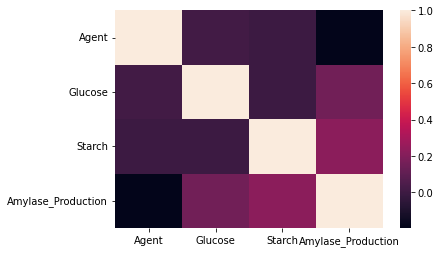

In [8]:
sns.heatmap(DF_S.corr())